In [31]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
TRAIN_PATH = '../DataBase/'
file = "بسم الله الرحمن الرحيم .. صوت (128  kbps) (shabakngy.com).wav"
ipd.Audio(TRAIN_PATH + file)

Sample rate: 44100Hz
Audio duration: 3.7877551020408164s
16255


(167040, 2)

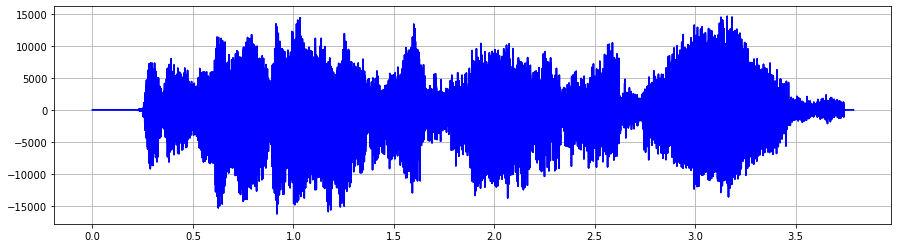

In [57]:
sample_rate, audio = wavfile.read(TRAIN_PATH + file)
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))
#notice that the sample rate is 44.1kHz which is the standart sampling rate for audio files
#Acording to Nyquist, that sampling rate of 44.1kHz give us band-width of 22.05kHz. => Sr = 2Fmax
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio,color='blue')
plt.grid(True)
# start :The starting value of the sequence.
# stop :The end value of the sequence, unless endpoint is set to False. In that case, the sequence consists of all but the last of num + 1 evenly spaced samples, so that stop is excluded. Note that the step size changes when endpoint is False.
# num :Number of samples to generate. Default is 50. Must be non-negative.
print(np.max(np.abs(audio)))
audio.shape

(167040, 2)

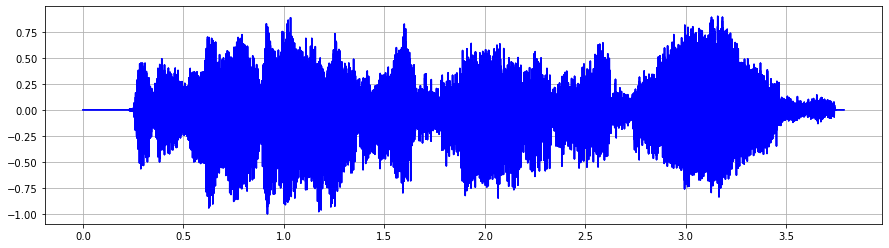

In [58]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio
audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio,color='blue')
plt.grid(True)    
audio.shape

In [59]:
def framing(sig, fs=16000, win_len=0.025, win_hop=0.01):
    """
    transform a signal into a series of overlapping frames.
    Args:
        sig            (array) : a mono audio signal (Nx1) from which to compute features.
        fs               (int) : the sampling frequency of the signal we are working with.
                                 Default is 16000.
        win_len        (float) : window length in sec.
                                 Default is 0.025.
        win_hop        (float) : step between successive windows in sec.
                                 Default is 0.01.
    Returns:
        array of frames.
        frame length.
    """
    # compute frame length and frame step (convert from seconds to samples)
    frame_length = win_len * fs
    frame_step = win_hop * fs
    signal_length = len(sig)
    frames_overlap = frame_length - frame_step
    # Make sure that we have at least 1 frame+
    num_frames = np.abs(signal_length - frames_overlap) // np.abs(frame_length - frames_overlap)
    rest_samples = np.abs(signal_length - frames_overlap) % np.abs(frame_length - frames_overlap)
    # Pad Signal to make sure that all frames have equal number of samples
    # without truncating any samples from the original signal
    if rest_samples != 0:
        pad_signal_length = int(frame_step - rest_samples)
        z = np.zeros((pad_signal_length))
        pad_signal = np.append(sig, z)
        num_frames += 1
    else:
        pad_signal = sig
    # make sure to use integers as indices
    frame_length = int(frame_length)
    frame_step = int(frame_step)
    num_frames = int(num_frames)
    # compute indices
    idx1 = np.tile(np.arange(0, frame_length), (num_frames, 1))
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_length, 1)).T
    indices = idx1 + idx2
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

In [47]:
hop_size = 15 #ms
FFT_size = 2048
audio_framed = framing(audio, fs=sample_rate)
print("Framed audio shape: {0}".format(audio_framed.shape))

Framed audio shape: (387, 1102)


In [48]:
audio.shape

(171136, 4098)

In [49]:
FFT_size=2048
hop_size=10
sample_rate=44100
np.pad(audio, int(FFT_size / 2), mode='reflect').shape

(173184, 6146)

In [50]:

print("First frame:")
audio_framed[1]

First frame:


array([0., 0., 0., ..., 0., 0., 0.])

In [51]:
print("Last frame:")
audio_framed[-1]

Last frame:


array([0., 0., 0., ..., 0., 0., 0.])

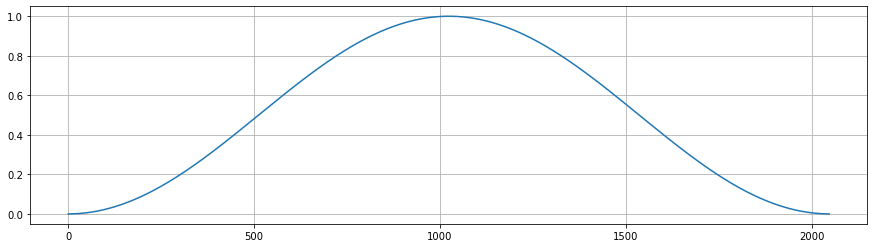

In [52]:
window = get_window("hann", FFT_size, fftbins=True)
plt.figure(figsize=(15,4))
plt.plot(window)
plt.grid(True)

In [54]:
audio_win = audio_framed * window
ind = 69
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(audio_framed[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win[ind])
plt.title('Frame After Windowing')
plt.grid(True)

ValueError: operands could not be broadcast together with shapes (387,1102) (2048,) 